In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 3
## Comparando Variables Categoricas

Para este ejercicio, vamos a utilizar datos de propinas. En particular, cuanto recibio cada día de la semana y por quién.

In [2]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
males = data[data["sex"]=="Male"]\
          .groupby("day")["tip"].sum().reset_index()
females = data[data["sex"]=="Female"]\
          .groupby("day")["tip"].sum().reset_index()

females

,day,tip
0,Thur,82.42
1,Fri,25.03
2,Sat,78.45
3,Sun,60.61


¡Recuerda, a partir de ahora, siempre agregar títulos adecuados y otros elementos que den claridad a tus gráficos!

### 1. Haz un gráfico de barras apilado. En el eje X, pon el día de la semana, y en el eje Y, las propinas. 

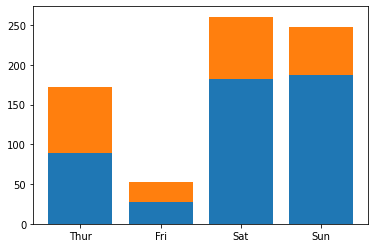

In [4]:
plt.bar(males["day"], males["tip"])
plt.bar(females["day"], females["tip"], bottom=males["tip"])
plt.show()

2. Repite el el gráfico anterior, pero esta vez, investiga cómo se hace y cambia los colores default por otros.

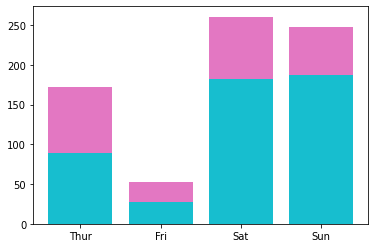

In [5]:
plt.bar(males["day"], males["tip"], color = "#17becf")
plt.bar(females["day"], females["tip"], bottom=males["tip"], color = "#e377c2")
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
plt.show()

3. Usa los colores del ejercicio anterior, pero esta vez, usa los datos en porcentaje y genera un gráfico de barras.

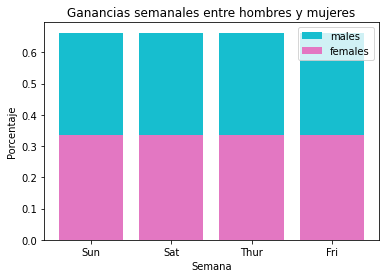

In [6]:
from pandas.core.tools.times import time
males = data[data["sex"]=="Male"]\
        ["tip"].sum()
females = data[data["sex"]=="Female"]\
        ["tip"].sum()
day = data["day"]

males , females = np.array(males) , np.array(females)

males_p = males / (males+females)
females_p = females / (males+females)

plt.title("Ganancias semanales entre hombres y mujeres")
plt.xlabel("Semana")
plt.ylabel("Porcentaje")

plt.bar(day,males_p, color = "#17becf")
plt.bar(day,females_p, color = "#e377c2")
plt.legend(["males", "females"])

plt.show()

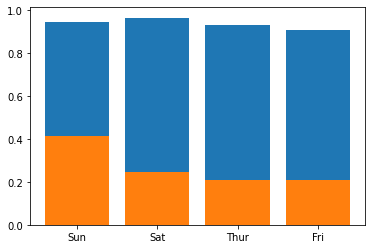

In [7]:
total_bill= data["total_bill"]
tip = data["tip"]
day = data["day"]

total_bill , tip = np.array(total_bill), np.array(tip)

total_bill_p = total_bill / (total_bill+tip)
tip_p = tip / (total_bill+tip)

plt.bar(day, total_bill_p)
plt.bar(day, tip_p)
plt.show()

4. Genera un gráfico de área para representar los datos anteriores. Usa los dos mismos colores que haz usado en los ejercicios anteriores.

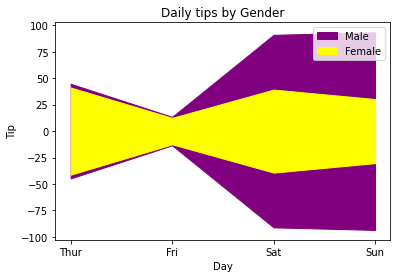

In [8]:
#plt.stackplot(day, males_p, females_p)
#plt.title("Ganancias semanales entre hombres y mujeres")
#plt.xlabel("Semana")
#plt.ylabel("Porcentaje")
#plt.legend(["males", "females"])
#plt.show()
females = [82.40,25.03,78.45,60.61]
males = [89.41,26.93,181.95, 186.78]
days = ["Thur", "Fri", "Sat", "Sun"]
plt.stackplot(days, males ,baseline="sym",color='purple')
plt.stackplot(days, females, baseline="sym", color= 'yellow')
plt.title("Daily tips by Gender")

plt.xlabel("Day")
plt.ylabel("Tip")

plt.legend(["Male", "Female"])

plt.show()

5. Suma los datos de _males_ y _females_ para tener las propinas totales por día de la semana. Genera un gráfico de waffle para representar esa data. En vez de cuadros, usa alguna otra forma.

Tip: puedes consultar https://fontawesome.com/search para ver formas que puedes usar.

In [9]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 34.3 MB/s eta 0:00:00


In [10]:
from pywaffle import Waffle

3256.8199999999997
1570.9499999999996


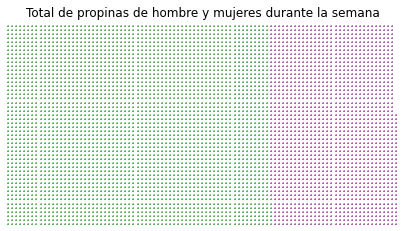

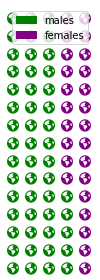

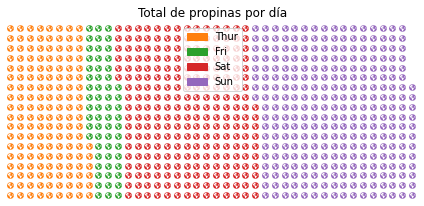

In [13]:
#males_t = data[data["sex"]=="Male"]\
#          .groupby("day")["total_bill"].sum().reset_index()
#females_t = data[data["sex"]=="Female"]\
#          .groupby("day")["total_bill"].sum().reset_index()

males_t = data[data["sex"]=="Male"]\
          ["total_bill"].sum()
females_t = data[data["sex"]=="Female"]\
          ["total_bill"].sum()

print(males_t)
print(females_t)

males_t , females_t = np.array(males_t), np.array(females_t)

valores = [males_t,females_t]

# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 50,
    values = valores,
    colors=("green", "purple"),
    legend={"loc":"upper center"},
    icons = 'earth') 

plt.title("Total de propinas de hombre y mujeres durante la semana")
plt.show() 

#Tomando algunos valores para visualizar el icono
v = {"males": 50, "females" : 25}

plt.figure(
    FigureClass = Waffle,
    rows = 15,
    values = v,
    colors=("green", "purple"),
    legend={"loc":"upper center"},
    icons = 'earth',icon_size=12) 

#plt.title("")
plt.show() 

totals = {"Thur": 150, "Fri" : 60, "Sat":250, "Sun":290}

plt.figure(
    FigureClass = Waffle,
    rows = 18,
    values = totals,
    colors=('#ff7f0e', '#2ca02c', '#d62728', '#9467bd'),
    legend={"loc":"upper center"},
    icons = 'earth')

plt.title("Total de propinas por día")
plt.show() 